In [2]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [5]:
full_LR_df = pd.read_csv('/Users/victoriagao/Documents/MSc/rotation/GW_lab/NEST_revision/RC1.7/Female_Naive_id1_top10k_z_axis.csv')
full_LR_df

,from_cell,to_cell,ligand,receptor,edge_rank,component,from_id,to_id,attention_score,z_axis_from,z_axis_to
0,a295d3f5-9149-41ef-92f4-25531e5dbfe7,13223e65-fd7b-497b-b54a-a9c941576e47,FN1,IGF2R,0,-1,33436,20759,0.020607,500,300
1,a34e5903-7e47-4a96-8b6d-9f12dcba3c91,f210a991-ece7-45bd-a758-dad8b92d2333,OXT,TACR1,0,-1,13944,27406,0.981292,200,400
2,a295d3f5-9149-41ef-92f4-25531e5dbfe7,8b4dbfee-10d5-4877-996c-e73da8c05efe,FN1,IGF2R,1,-1,33436,33432,0.020608,500,500
3,a34e5903-7e47-4a96-8b6d-9f12dcba3c91,03333b23-50bd-4466-ab09-25d4d7b6dba6,OXT,TACR1,1,-1,13944,20494,0.981295,200,300
4,eabfb28b-3d10-4907-bb59-44ff4065f0e0,441e582f-acdb-4240-a16e-bc48a3b79426,PNOC,GALR2,2,-1,33144,19837,0.020607,500,300
...,...,...,...,...,...,...,...,...,...,...,...
9995,e7ab5b11-8723-4b87-ad44-5b01cc624247,e5f32358-31e8-4724-b681-639dce44acf2,OXT,CCKAR,5016,-1,9558,8168,0.981344,100,100
9996,23098c41-9032-47a4-97cc-f4e00c0fd39c,62c77dd5-b7c5-4e6e-8650-b4fdc74d436f,PNOC,NPY2R,5017,-1,18724,18665,0.019888,200,200
9997,36dd0a49-a2b9-4dc0-ad4b-ba759e9b062b,c72db737-acb8-4a6a-a6cd-e2f5c1f3e049,OXT,CCKAR,5017,-1,22708,16198,0.981371,300,200
9998,87e96a56-ddd6-4dfb-9e57-45ee28d9ada3,5d40b5f3-271e-4969-ac57-3863a8804180,BDNF,ESR1,5018,-1,34739,21991,0.022791,500,300


In [12]:
# Extract rows from the full_LR_df that z_axis_from == z_axis_to
between_slices_LR = full_LR_df[full_LR_df['z_axis_from'] == full_LR_df['z_axis_to']]
# make new dataframe with only columns: ligand, receptor, z_axis_from, z_axis_to
between_slices_LR = between_slices_LR[['ligand', 'receptor', 'z_axis_from', 'z_axis_to']]
# make new column combining ligand and receptor, such that ligand_receptor = ligand + '-' + receptor
between_slices_LR['ligand_receptor'] = between_slices_LR['ligand'] + '-' + between_slices_LR['receptor']
between_slices_LR

,ligand,receptor,z_axis_from,z_axis_to,ligand_receptor
2,FN1,IGF2R,500,500,FN1-IGF2R
5,OXT,TACR1,200,200,OXT-TACR1
6,PNOC,NPY1R,500,500,PNOC-NPY1R
11,OXT,CCKAR,200,200,OXT-CCKAR
14,PNOC,GALR2,500,500,PNOC-GALR2
...,...,...,...,...,...
9983,OXT,CCKBR,0,0,OXT-CCKBR
9985,FN1,IGF2R,0,0,FN1-IGF2R
9992,PNOC,NPY2R,400,400,PNOC-NPY2R
9995,OXT,CCKAR,100,100,OXT-CCKAR


In [16]:
# Extract rows from the full_LR_df that z_axis_from != z_axis_to
within_slices_LR = full_LR_df[full_LR_df['z_axis_from'] != full_LR_df['z_axis_to']]
# make new dataframe with only columns: ligand, receptor, z_axis_from, z_axis_to
within_slices_LR = within_slices_LR[['ligand', 'receptor', 'z_axis_from', 'z_axis_to']]
# make new column combining ligand and receptor, such that ligand_receptor = ligand + '-' + receptor
within_slices_LR['ligand_receptor'] = within_slices_LR['ligand'] + '-' + within_slices_LR['receptor']
# check number of unique ligand_receptor in within_slices_LR
len(within_slices_LR['ligand_receptor'].unique())
# make table of each type of ligang_receptor and the number of times it appears in within_slices_LR
within_slices_LR_table = within_slices_LR['ligand_receptor'].value_counts().reset_index()
within_slices_LR_table.columns = ['ligand_receptor', 'count']
within_slices_LR_table

,ligand_receptor,count
0,PNOC-OPRL1,1408
1,OXT-CCKBR,1280
2,FN1-IGF2R,1032
3,OXT-TACR1,601
4,OXT-HTR2C,589
5,BDNF-ESR1,465
6,PNOC-NPY2R,336
7,OXT-LPAR1,324
8,OXT-CCKAR,228
9,PNOC-LPAR1,115


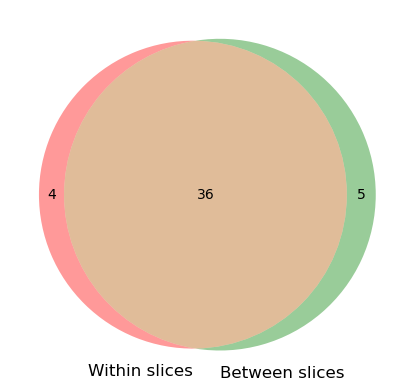

In [20]:
# show all common and unique ligand_receptor pairs between within_slices_LR and between_slices_LR
# make a venn diagram
venn2([set(within_slices_LR['ligand_receptor']), set(between_slices_LR['ligand_receptor'])], set_labels = ('Within slices', 'Between slices'))
# See how many common ligand-receptor pairs are shared between within_slices_LR and between_slices_LR
# venn2([set(within_slices_LR['ligand_receptor']), set(between_slices_LR['ligand_receptor'])], set_labels = ('Within slices', 'Between slices'))